In [23]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

In [3]:
dataset = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-simple-linear-regression/Datasets/kc_house_data.csv")
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
dataset.shape

(21613, 21)

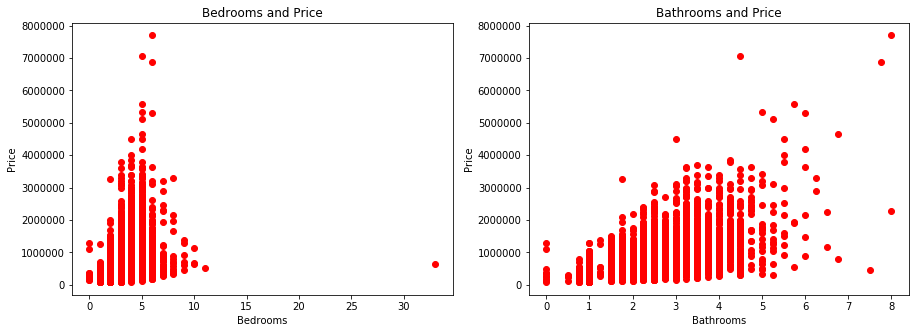

In [8]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(dataset["bedrooms"], dataset["price"], color = "red")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms and Price")
plt.subplot(1,2,2)
plt.scatter(dataset["bathrooms"], dataset["price"], color = "red")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Bathrooms and Price")
plt.show()

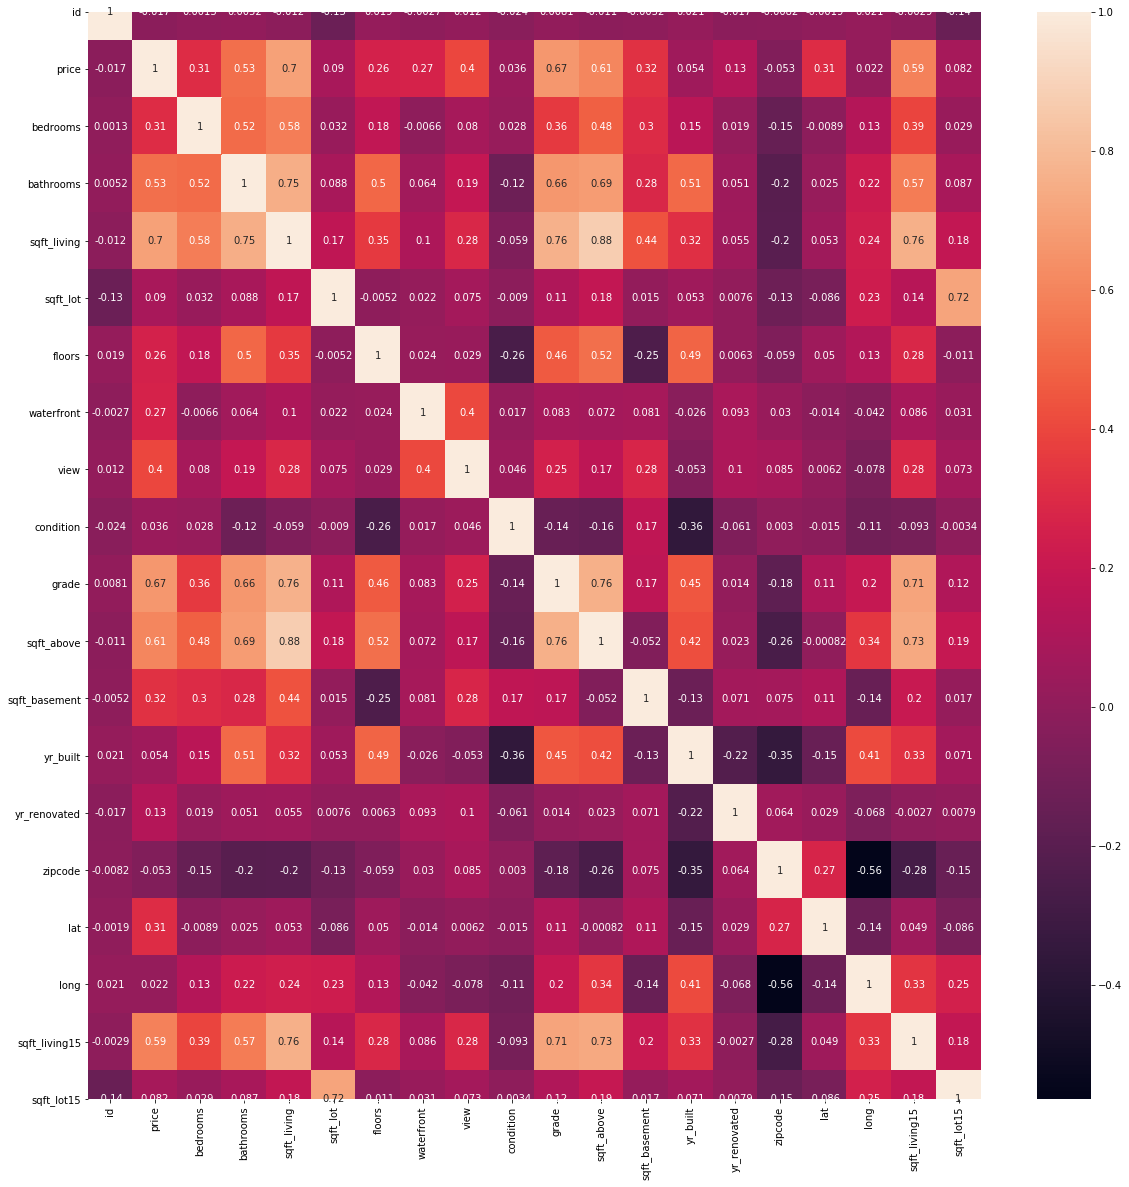

In [9]:
%matplotlib inline

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(dataset.corr(), annot = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48e681e2e8>,
      dtype=object)

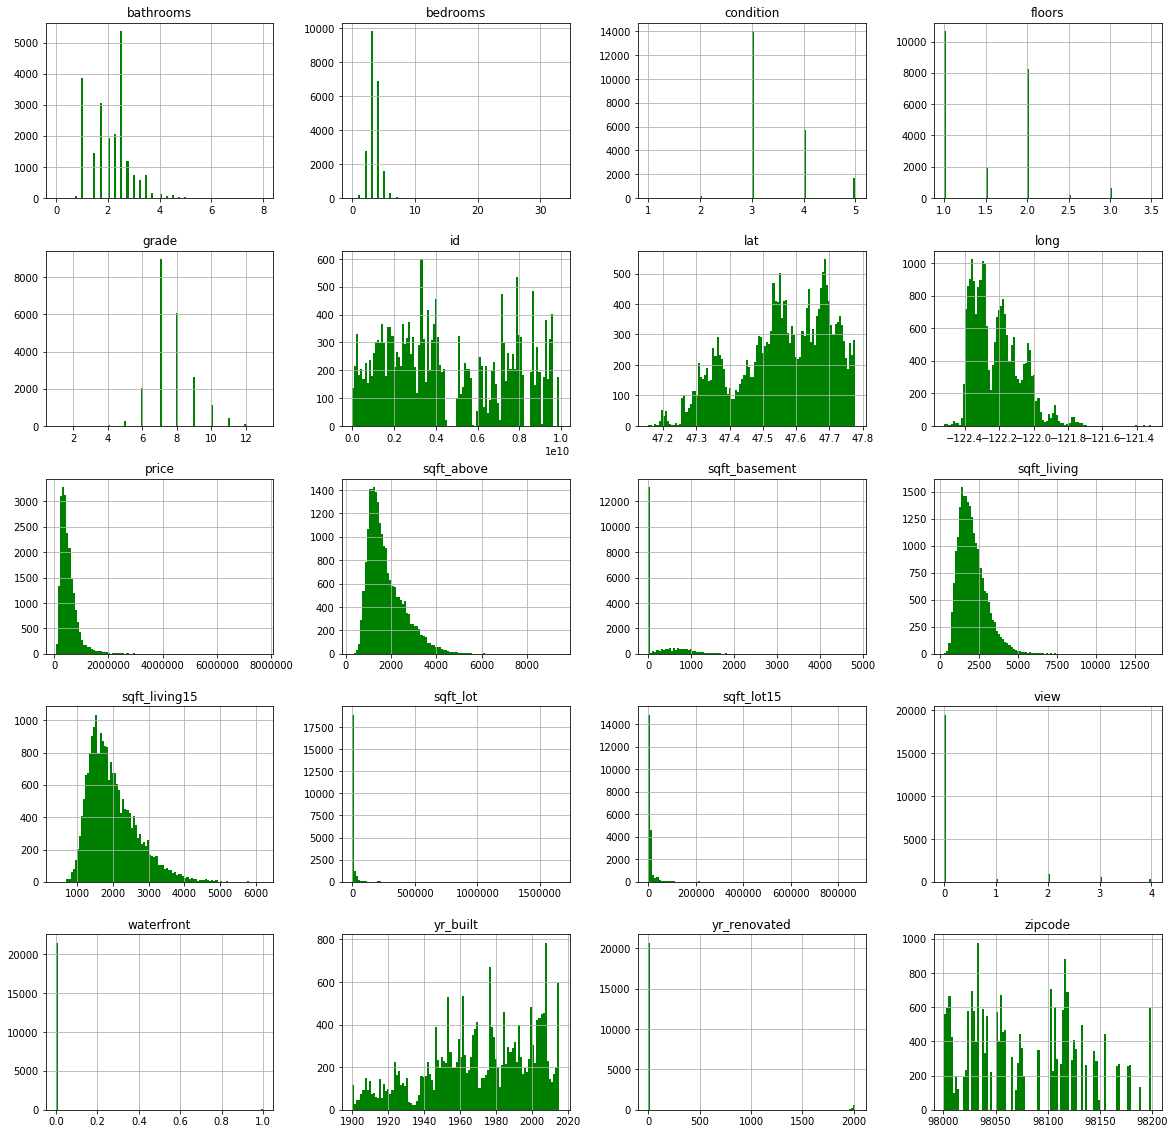

In [10]:
dataset.hist(bins = 100, figsize = (20,20), color = 'g')

In [12]:
dataset_train = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-simple-linear-regression/Datasets/kc_house_Train.csv")
dataset_test = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-simple-linear-regression/Datasets/kc_house_Test.csv")
dataset_train

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,15124,6751500285,20140731T000000,555700.0,3,2.00,1810,12420,1.0,0,...,7,1810,0,1957,0,98008,47.5888,-122.127,2230,12330
15125,15125,1310370020,20140708T000000,690000.0,4,2.50,3220,35400,2.0,0,...,9,3220,0,1991,0,98072,47.7547,-122.114,3050,35252
15126,15126,4019300680,20141231T000000,449000.0,3,1.75,1660,9697,1.0,0,...,7,1660,0,1952,0,98155,47.7564,-122.286,2060,20624
15127,15127,4408100095,20140502T000000,308500.0,2,1.00,850,6174,1.0,0,...,7,850,0,1950,0,98155,47.7352,-122.328,1100,6174


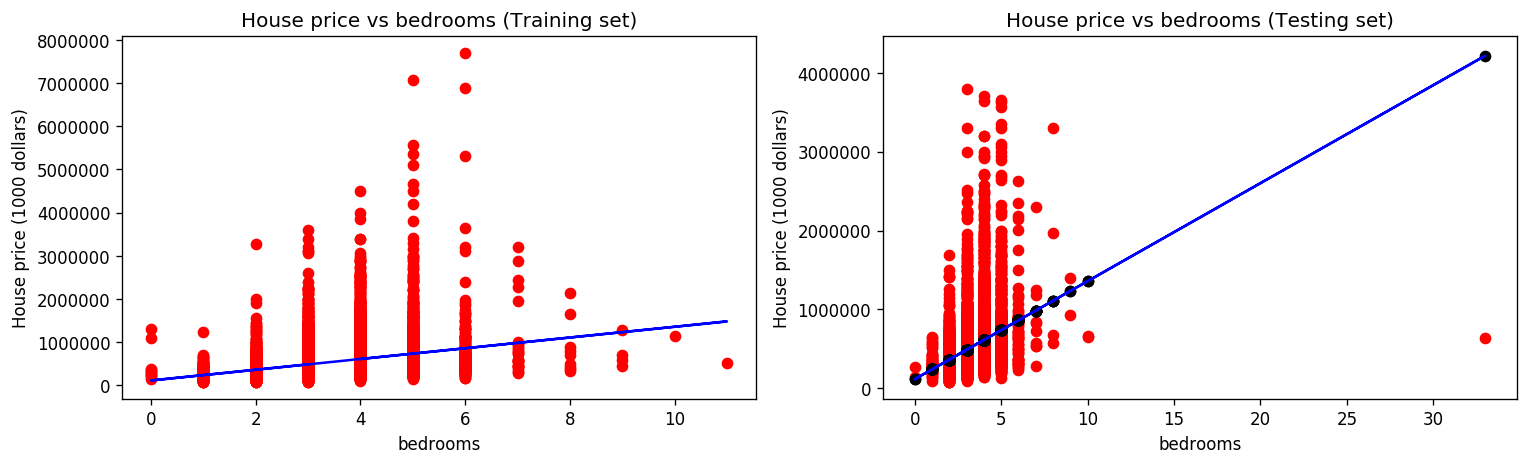

R square (bedrooms) = 0.09090622878263988
RMSE (bedrooms) = 351033.5831330742
MSE (bedrooms) = 123224576487.24493
MAE (bedrooms) = 221473.40180475538


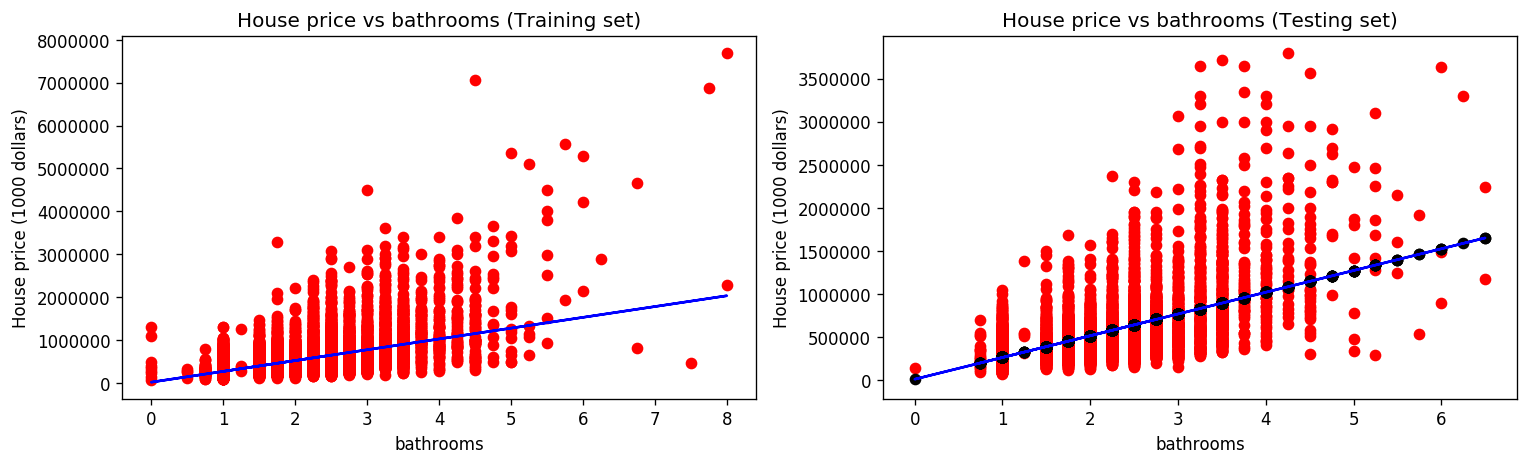

R square (bathrooms) = 0.2801516895366424
RMSE (bathrooms) = 312366.7657069452
MSE (bathrooms) = 97572996318.2176
MAE (bathrooms) = 213592.00279634562


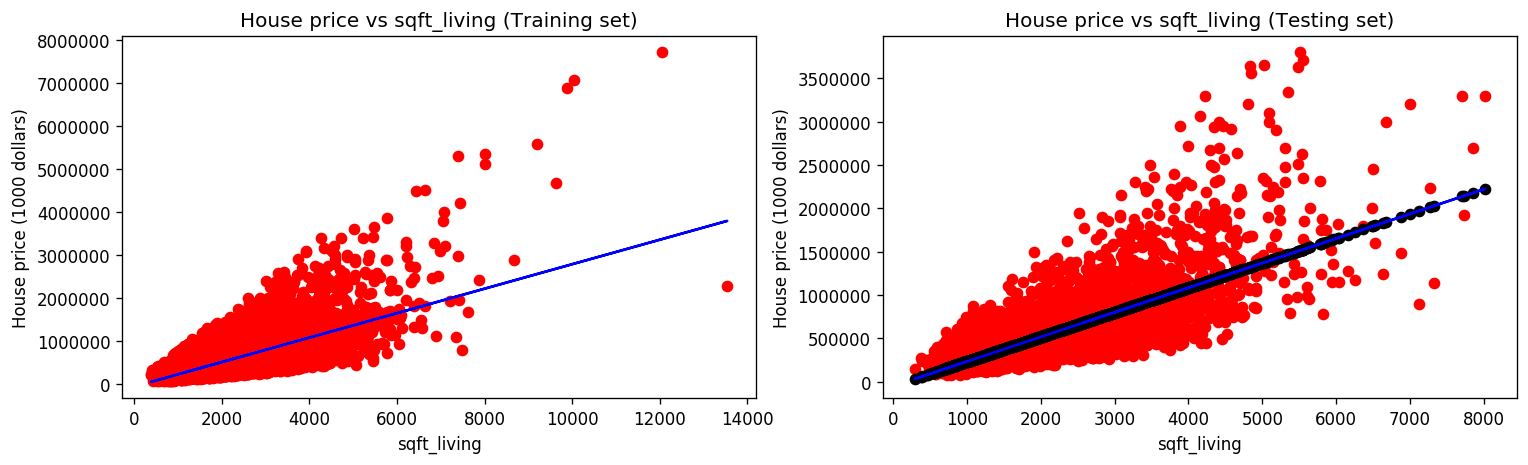

R square (sqft_living) = 0.4922323631081178
RMSE (sqft_living) = 262347.4423789367
MSE (sqft_living) = 68826180522.76952
MAE (sqft_living) = 179360.39291667612


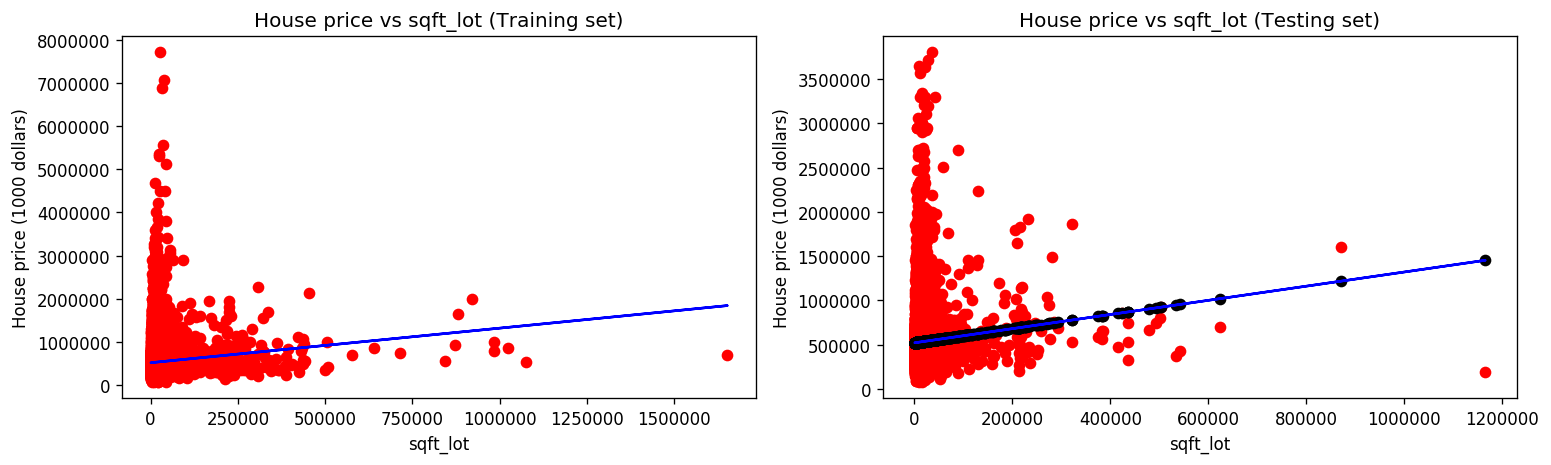

R square (sqft_lot) = 0.0016054986429243634
RMSE (sqft_lot) = 367870.8842720086
MSE (sqft_lot) = 135328987495.06953
MAE (sqft_lot) = 233258.36396528236


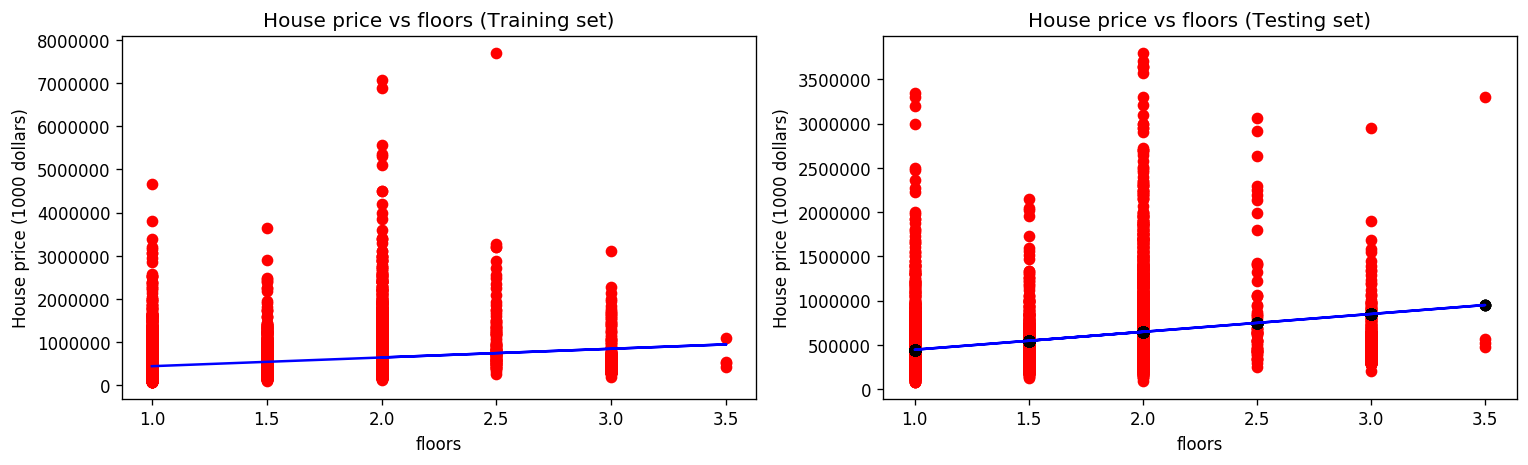

R square (floors) = 0.027281455056079484
RMSE (floors) = 363109.76124553743
MSE (floors) = 131848698711.79118
MAE (floors) = 242111.11780684558


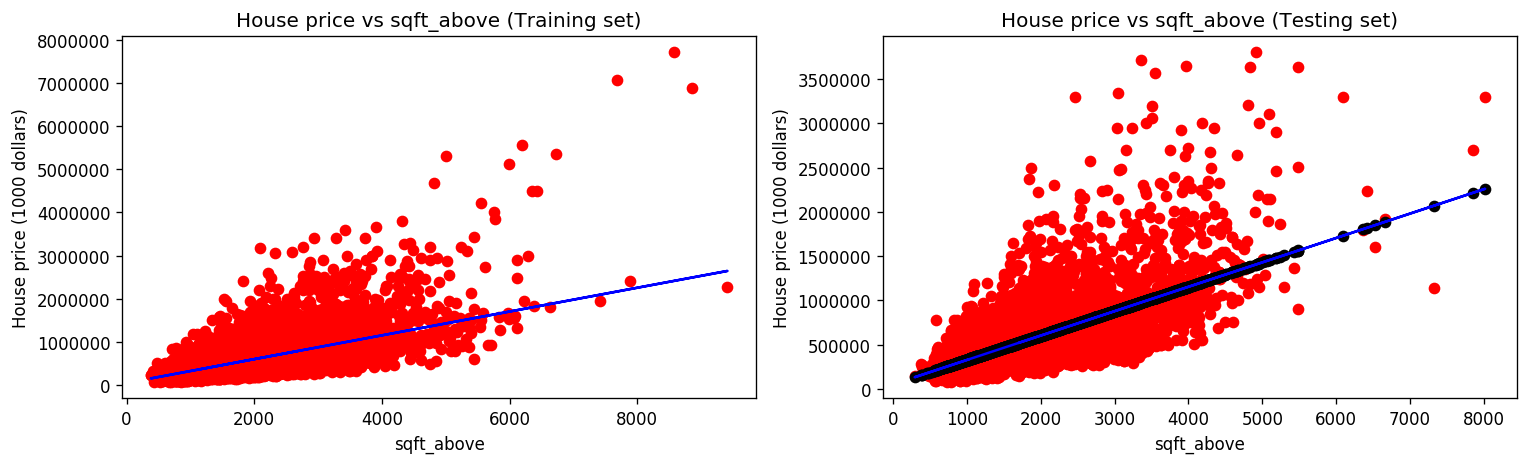

R square (sqft_above) = 0.3618585937478416
RMSE (sqft_above) = 294105.2577770554
MSE (sqft_above) = 86497902652.10818
MAE (sqft_above) = 200638.75446682537


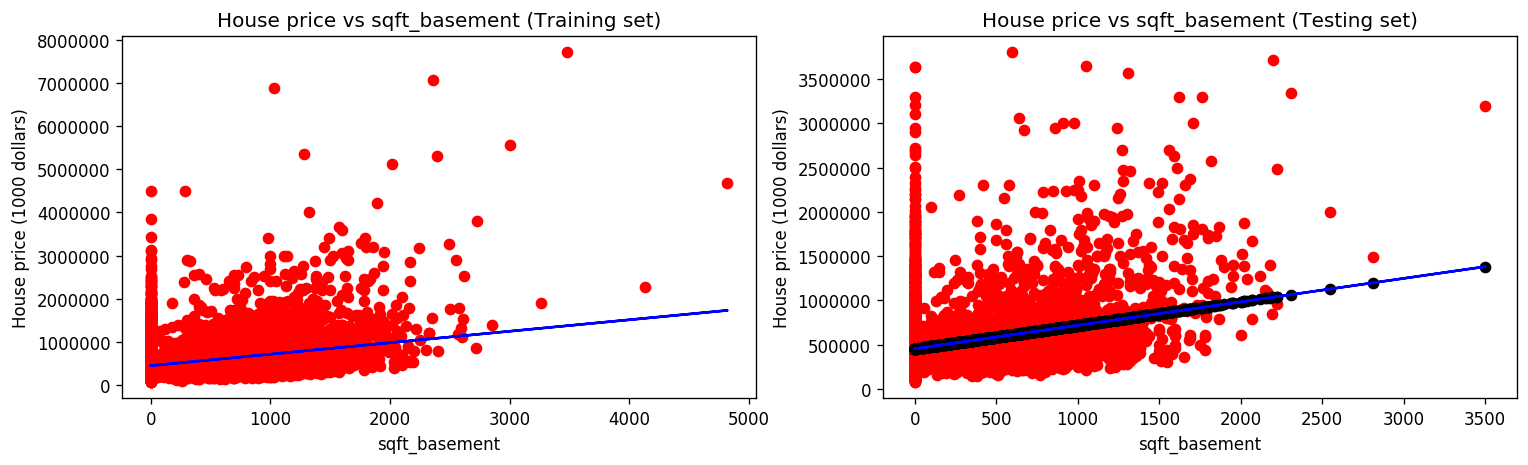

R square (sqft_basement) = 0.09590251492385227
RMSE (sqft_basement) = 350067.63182456256
MSE (sqft_basement) = 122547346851.25748
MAE (sqft_basement) = 221215.32438948483


In [34]:
columns = [4,5,6,7,8,13,14]
for i in columns:
    # Split dataset to input X and outcome Y
    X_train = np.array(dataset_train.iloc[:,i].values).reshape(-1,1)
    Y_train = np.array(dataset_train.iloc[:,3].values)
    X_test = np.array(dataset_test.iloc[:,i].values).reshape(-1,1)
    Y_test = np.array(dataset_test.iloc[:,3].values)
    fig = plt.subplots(1,2, figsize = (15,4), sharey=True, dpi=120)
    name_columns = dataset_train.columns[i]
    
    #Training model
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)

    #Result Training Set
    plt.subplot(1,2,1)
    Y_train_pred = regressor.predict(X_train)
    plt.scatter(X_train, Y_train, color = "red")
    plt.plot(X_train, Y_train_pred, color = "blue")
    plt.title("House price vs %s (Training set)"%name_columns)
    plt.xlabel(name_columns)
    plt.ylabel("House price (1000 dollars)")

    #Check result testing set
    plt.subplot(1,2,2)
    Y_test_pred = regressor.predict(X_test)
    plt.scatter(X_test, Y_test, color = "red")
    plt.plot(X_test, Y_test_pred, color = "blue")
    plt.scatter(X_test, Y_test_pred, color = "black")
    plt.title("House price vs %s (Testing set)" %name_columns)
    plt.xlabel(name_columns)
    plt.ylabel("House price (1000 dollars)")
    plt.savefig(name_columns+".png",dpi=120)
    plt.show()
    #Model evaluation
    print("R square ("+ name_columns +") =",r2_score(Y_test, Y_test_pred))
    print("RMSE ("+ name_columns +") =", sqrt(mean_squared_error(Y_test, Y_test_pred)))
    print("MSE ("+ name_columns +") =", mean_squared_error(Y_test, Y_test_pred))
    print("MAE ("+ name_columns +") =", mean_absolute_error(Y_test, Y_test_pred))